In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


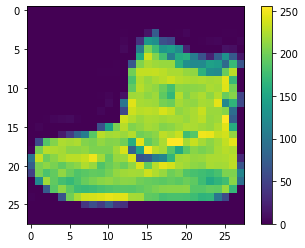

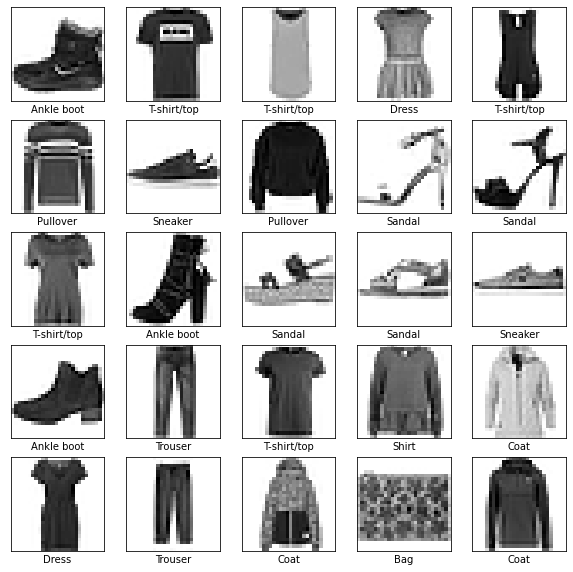

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5002 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3762 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2937 - accuracy: 0.8910
313/313 - 0s - loss: 0.3538 - accuracy: 0.8708 - 482ms/epoch - 2ms/step

테스트 정확도: 0.8708000183105469


In [7]:
#출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko#top_of_page
#01. 학습데이터 입력하기: 10개의 범주로 구분된 70,000(7만)개 패션이미지를 학습시킵니다
# 0=티셔츠, 1=바지, 2=풀오버, 3=드레스, 4=코트, 5=샌들, 6=셔츠, 7=스니커, 8=가방, 9=앵클부츠

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

len(train_labels)

train_labels

test_images.shape

len(test_labels)

#데이터전처리
#네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 
#훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#모델구성: 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#모델훈련: 신경망모델을 훈련합니다. 

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

# 테스트 정확도는 얼마입니까? (테스트 정확도: 0.8773000240325928, 87.7%)

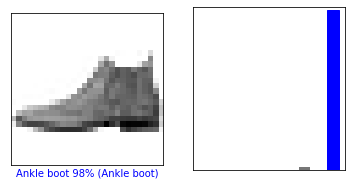

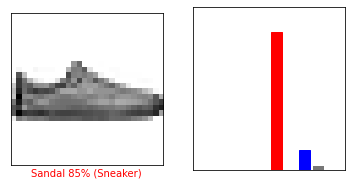

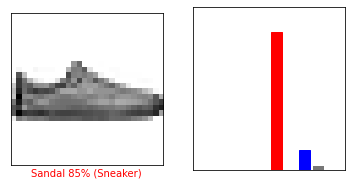

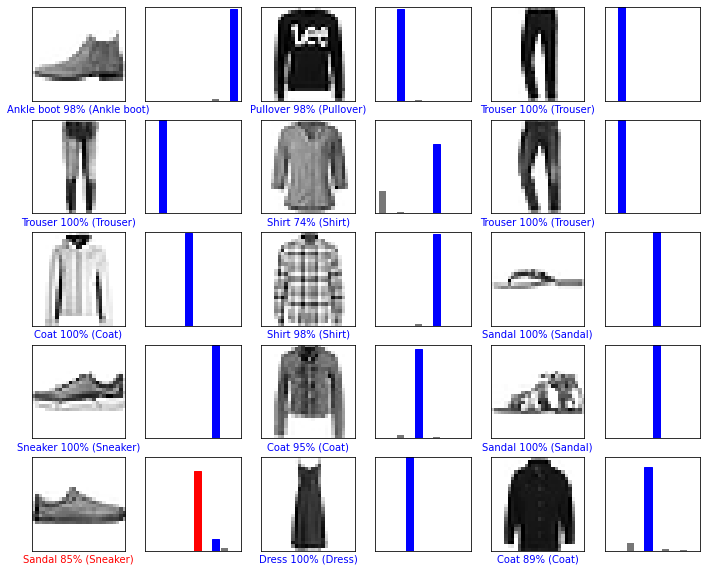

(28, 28)
(1, 28, 28)
[[5.7604047e-05 4.6000375e-07 4.5469901e-06 9.6725309e-08 1.8423760e-05
  7.7212555e-04 3.7593178e-05 1.6898114e-02 4.0896888e-05 9.8217010e-01]]


9

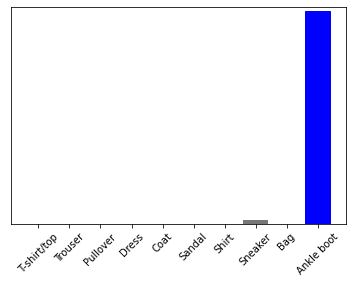

In [8]:
#출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko#top_of_page
#02 예측만들기: 훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.
# 최종 예측결과는 무엇입니다? (9=앵클부츠)

predictions = model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

#앵클부츠를 잘 맞추었나요? 
# 0=티셔츠, 1=바지, 2=풀오버, 3=드레스, 4=코트, 5=샌들, 6=셔츠, 7=스니커, 8=가방, 9=앵클부츠


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


#스니커즈를 잘 맞추었나요? 
# 0=티셔츠, 1=바지, 2=풀오버, 3=드레스, 4=코트, 5=샌들, 6=셔츠, 7=스니커, 8=가방, 9=앵클부츠

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

#여러개 예측 신뢰도를 평가해봅시다. 
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# 마지막 훈련입니다.
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# 최종 예측결과는 무엇입니다? (9=앵클부츠)

np.argmax(predictions_single[0])

#출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko#top_of_page